R² Score (Linear Regression): 0.9526
R² Score (Ridge Regression): 0.9524
R² Score (Lasso Regression): 0.9525


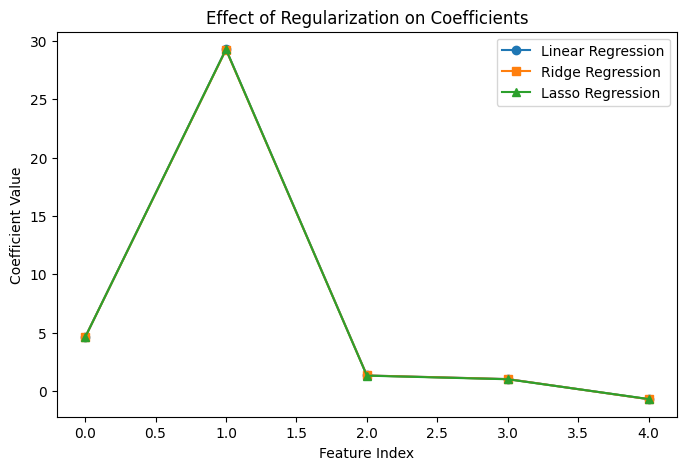

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate a dataset prone to overfitting
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # 5 Features
y = 5 * X[:, 0] + 3 * X[:, 1] ** 2 + np.random.randn(100) * 5  # Non-linear pattern with noise

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # Regularization strength
lasso_reg = Lasso(alpha=0.1)  # Regularization strength

lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Step 3: Evaluate models
r2_lin = r2_score(y_test, y_pred_lin)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"R² Score (Linear Regression): {r2_lin:.4f}")
print(f"R² Score (Ridge Regression): {r2_ridge:.4f}")
print(f"R² Score (Lasso Regression): {r2_lasso:.4f}")

# Visualizing coefficients
plt.figure(figsize=(8, 5))
plt.plot(lin_reg.coef_, label="Linear Regression", marker="o")
plt.plot(ridge_reg.coef_, label="Ridge Regression", marker="s")
plt.plot(lasso_reg.coef_, label="Lasso Regression", marker="^")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Effect of Regularization on Coefficients")
plt.legend()
plt.show()
